# Pollution and mental performance in BCN

## Inicialització

In [1]:
import warnings
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')

## Anàlisi exploratori de dades inicial

In [3]:
print(f"Les seves dimensions són: {df.shape[0]} individus i {df.shape[1]} variables")
print(f"Llistat de variables: {list(df.columns)}")

Les seves dimensions són: 3348 individus i 95 variables
Llistat de variables: ['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour', 'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia', 'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador', 'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor', 'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct', 'response_duration_ms', 'performance', 'mean_congruent', 'inhib_control', 'z_performance', 'z_mean_incongruent', 'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h', 'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30', 'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg', 'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day', 'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day', 'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h', 'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary', 'precip_24h_binary', 'ma

Codifiquem algunes variables com a categòriques, i n'eliminem algunes ja que no són rellevants o contenen informació repetida en altres.
Més endavant valorarem si, estudiant les correlacions, cal treure'n més.

In [4]:
list_to_cat = ['ID_Zenodo', 'year', 'month', 'day', 'dayoftheweek', 'hour',
               'mentalhealth_survey', 'bienestar', 'energia', 'estres', 'sueno', 
               'occurrence_stroop', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in list_to_cat:
    df[name] = df[name].astype('category')

In [5]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

In [6]:
eliminations = ['date_all', 'mean_incongruent', 'correct', 'response_duration_ms',
                'mean_congruent', 'horasfuera', 'inhib_control', 'z_mean_incongruent',
                'z_inhib_control', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
                'no2gps_24h_x30', 'min_gps', 'hour_gps', 'sec_noise55_day', 'sec_noise65_day',
                'sec_greenblue_day', 'Houron', 'Houroff', 'start_day', 'start_month', 'start_year',
                'start_hour', 'end_day', 'end_month', 'end_year', 'end_hour', 'Totaltime', 
                'Totaltime_estimated', 'mentalhealth_survey', 'stroop_test', 'occurrence_stroop',
                'yearbirth', 'year', 'month', 'day', 'hour', 'µgm3']
df = df.drop(eliminations, axis=1)

Procedim a realitzar alguns gràfics

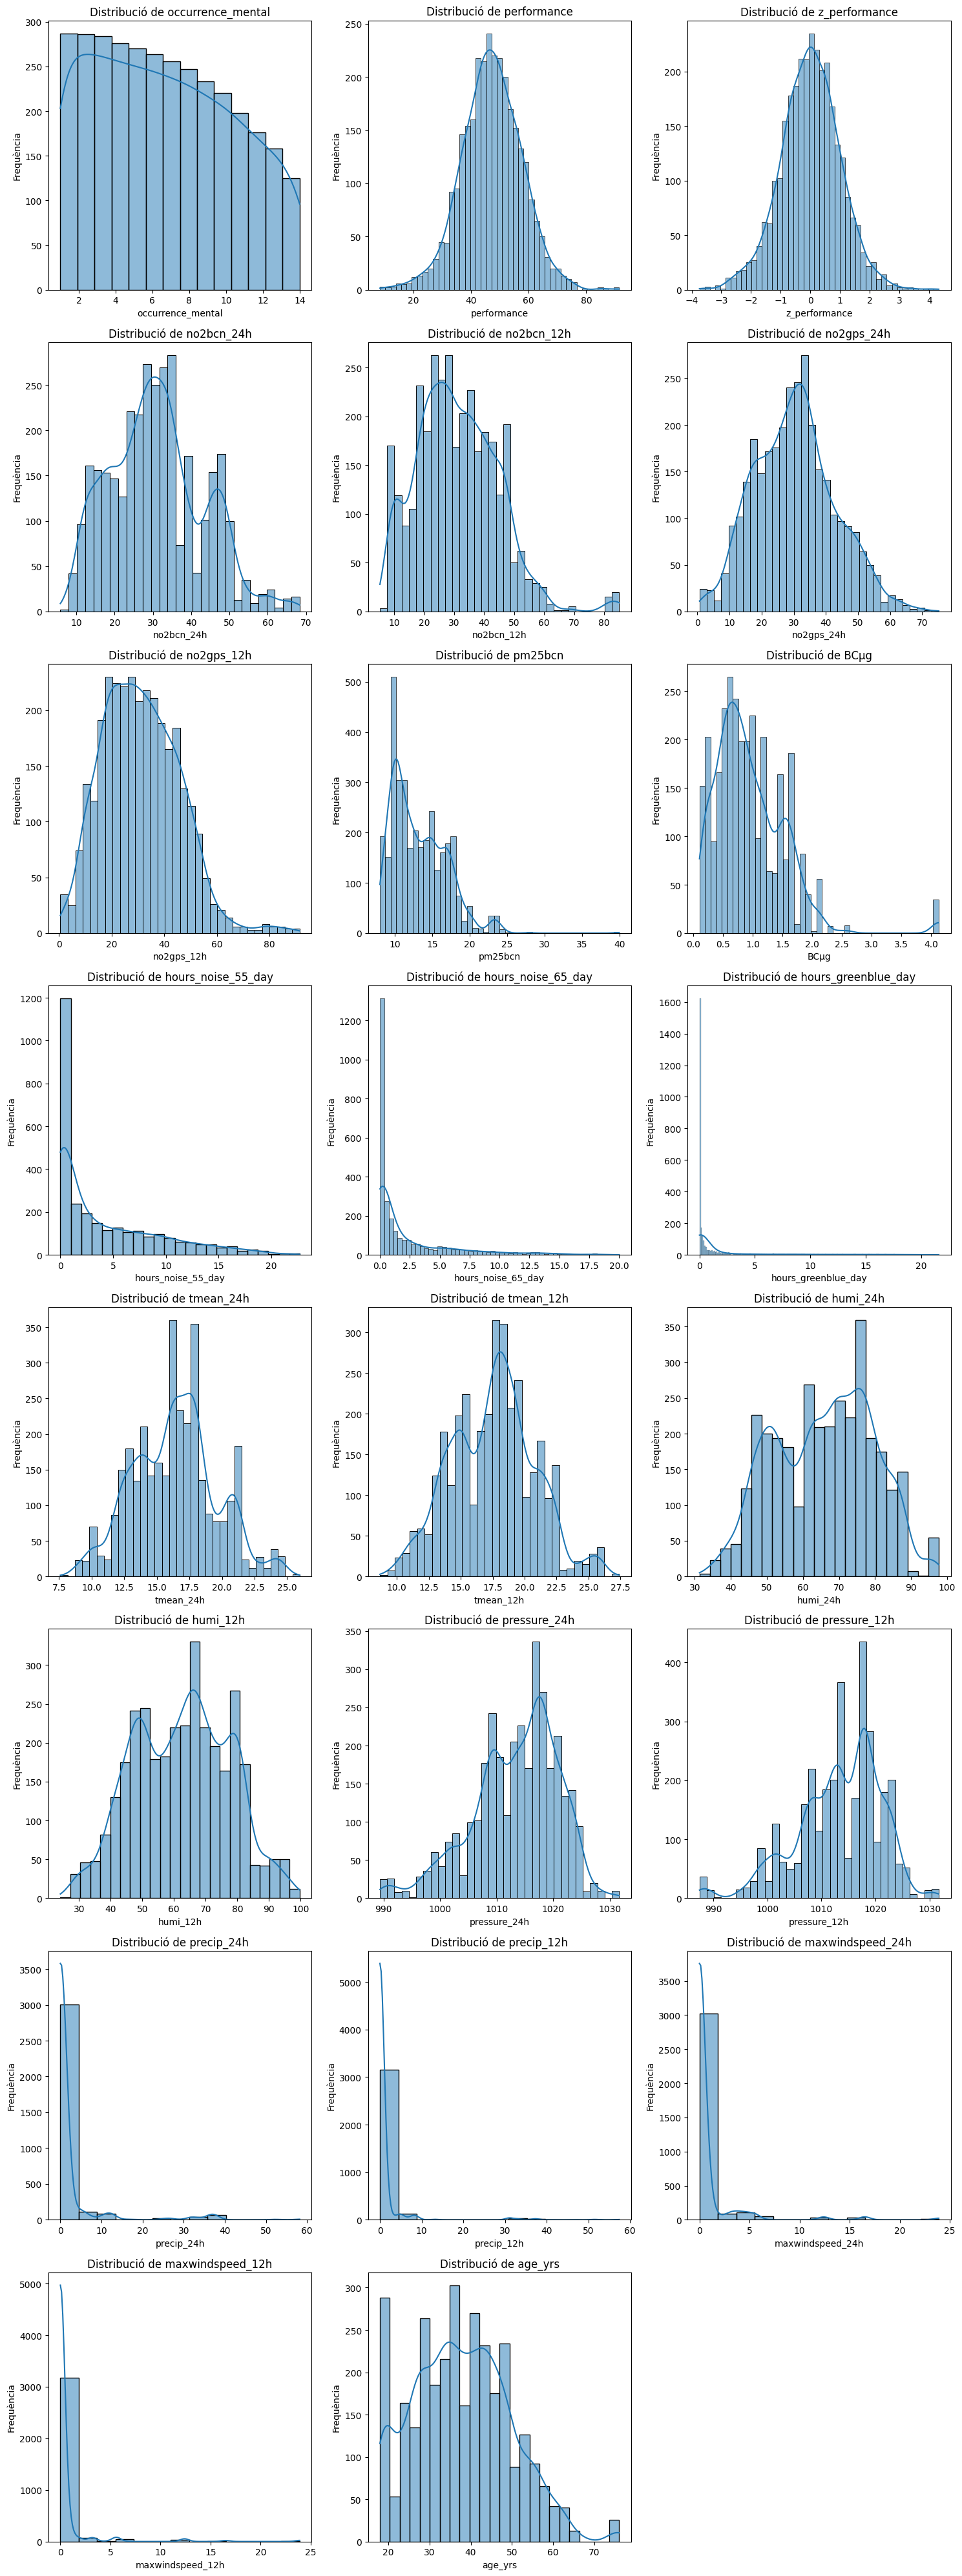

In [7]:
# Gráfics de distribució per variables numèriques
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


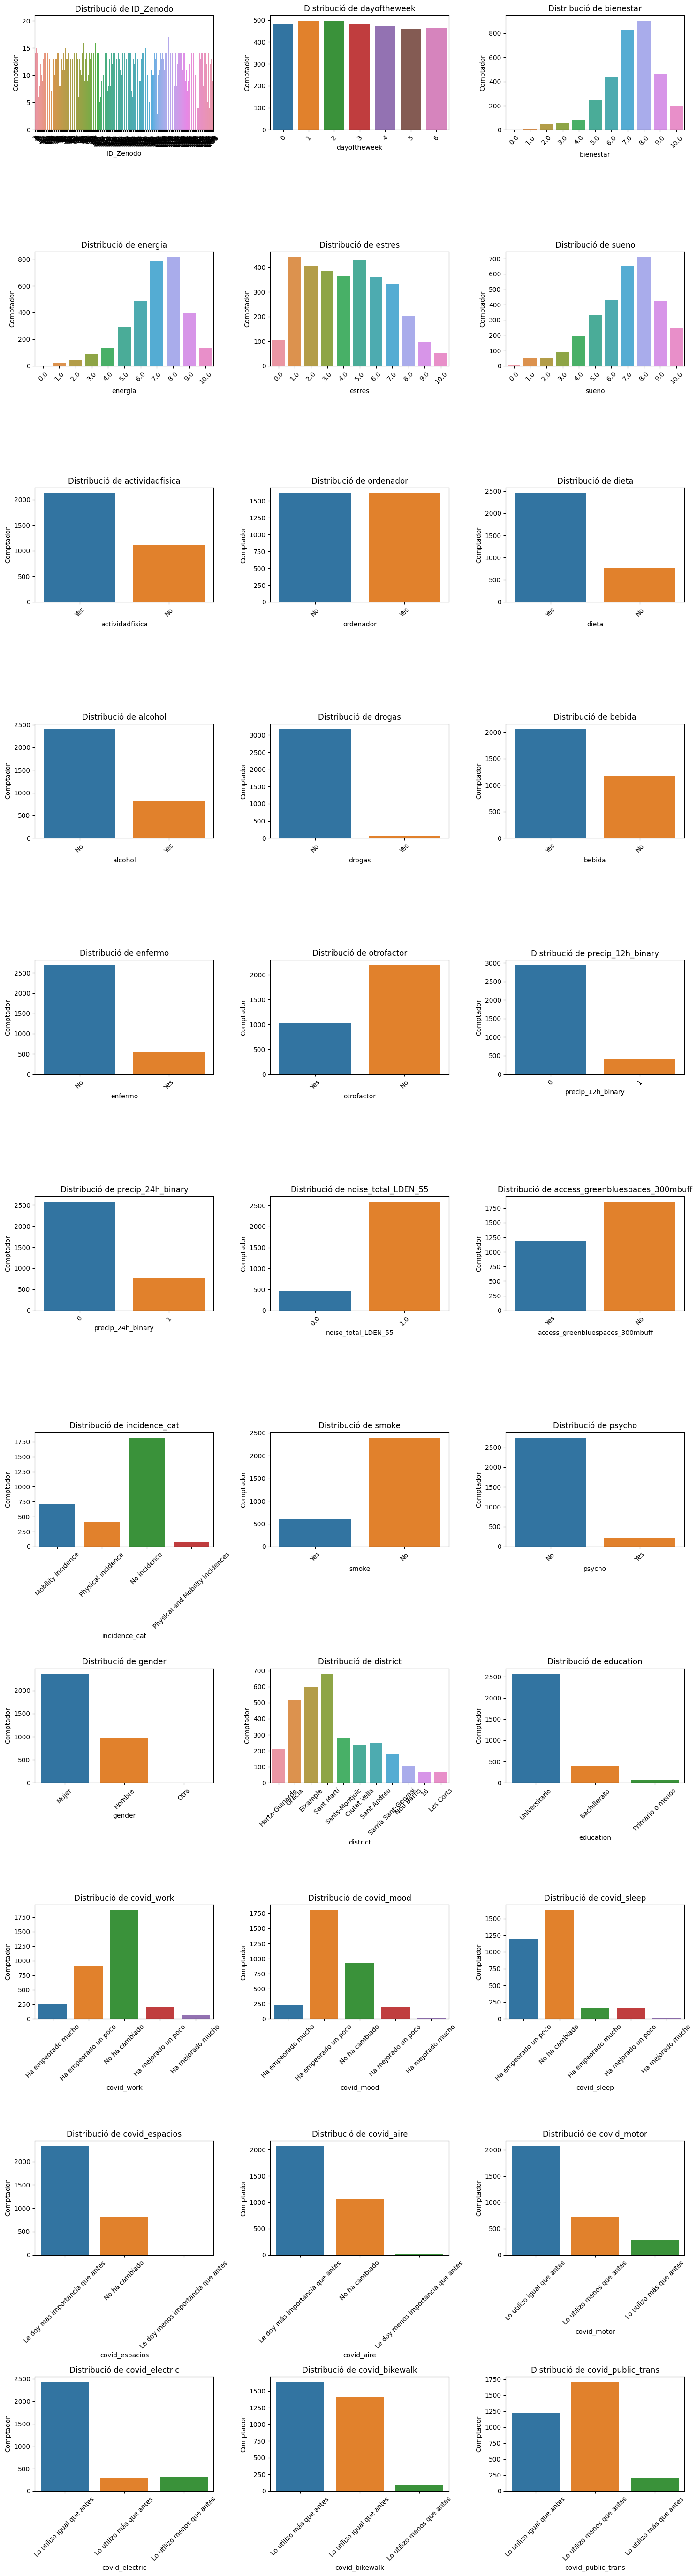

In [8]:
# Gráfics de barres per variables categòriques
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=df, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

Visualitzem els missing values per variable

missing_values
occurrence_mental                            68
bienestar                                    75
energia                                     141
estres                                      175
sueno                                       158
actividadfisica                             116
ordenador                                   121
dieta                                       122
alcohol                                     126
drogas                                      121
bebida                                      123
enfermo                                     127
otrofactor                                  138
performance                                 302
z_performance                               302
no2gps_24h                                  197
no2gps_12h                                  202
BCμg                                        280
hours_noise_55_day                          490
hours_noise_65_day                          490
hours_greenblue_day                         490
noise_total_LDEN_55                         300
access_greenbluespaces_300mbuff             300
incidence_cat                               330
age_yrs                                     176
smoke                                       348
psycho                                      384
gender                                       10
district                                    165
education                                   315
covid_work                                   35
covid_mood                                  174
covid_sleep                                 189
covid_espacios                              198
covid_aire                                  198
covid_motor                                 253
covid_electric                              302
covid_bikewalk                              212
covid_public_trans                          212

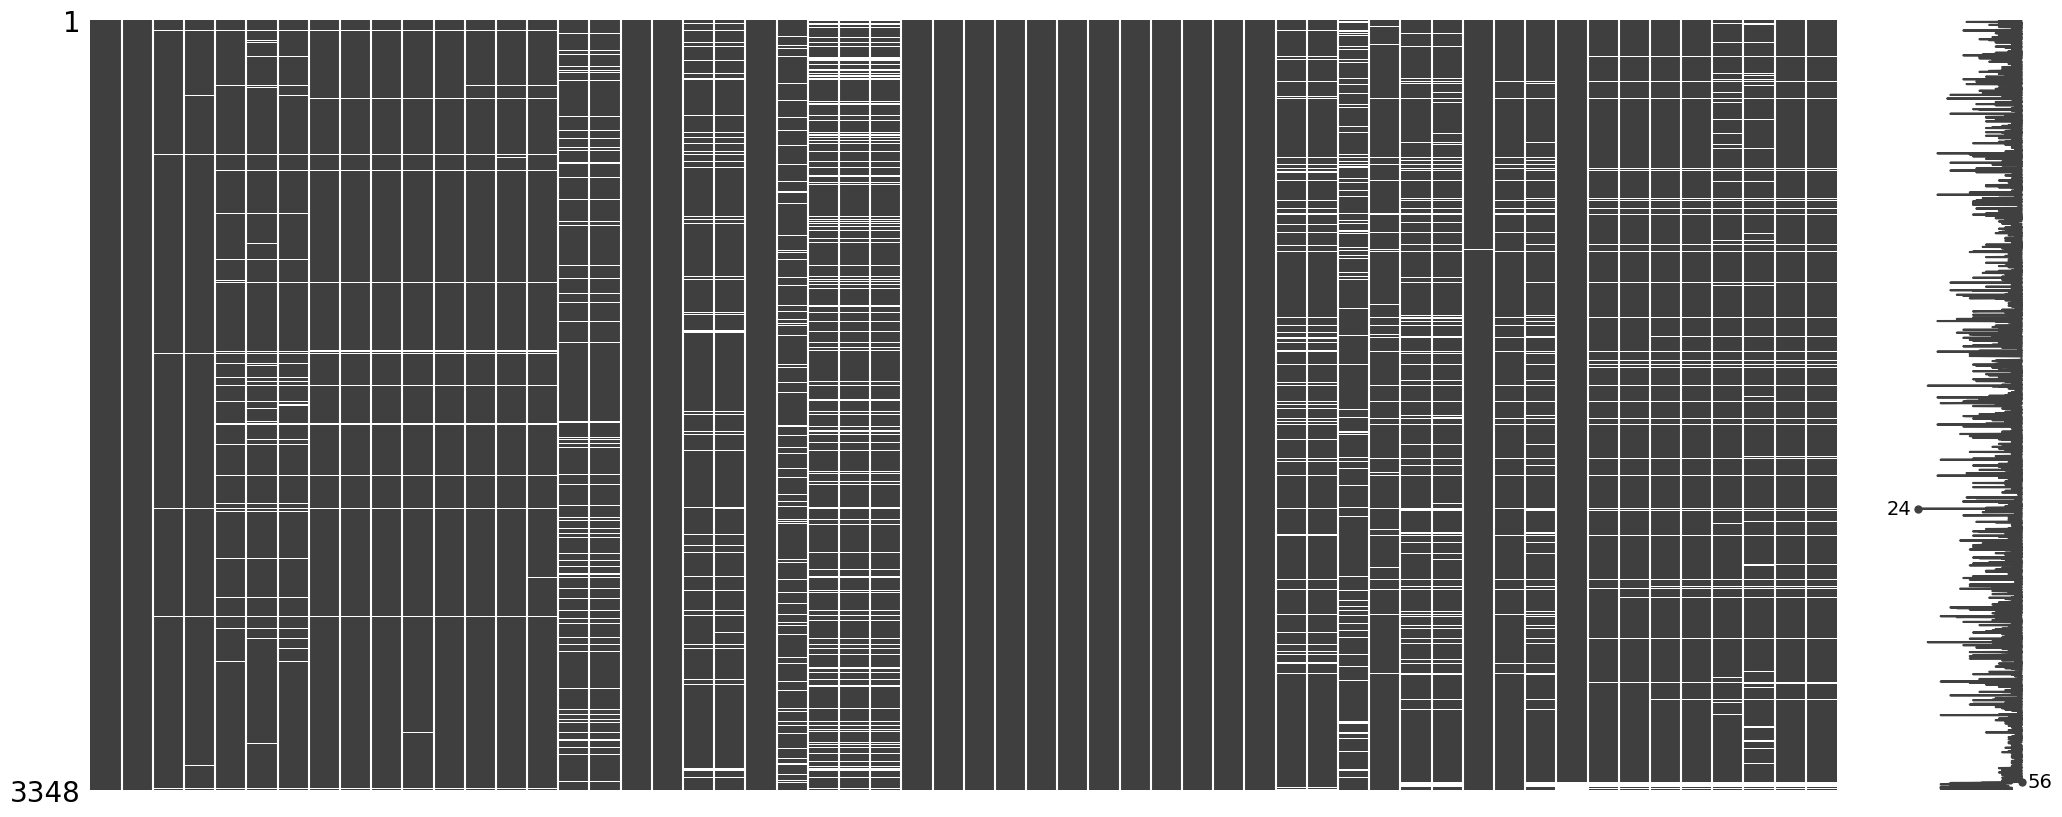

In [9]:
import missingno as msno
msno.matrix(df)

missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

In [10]:
df.shape

(3348, 56)

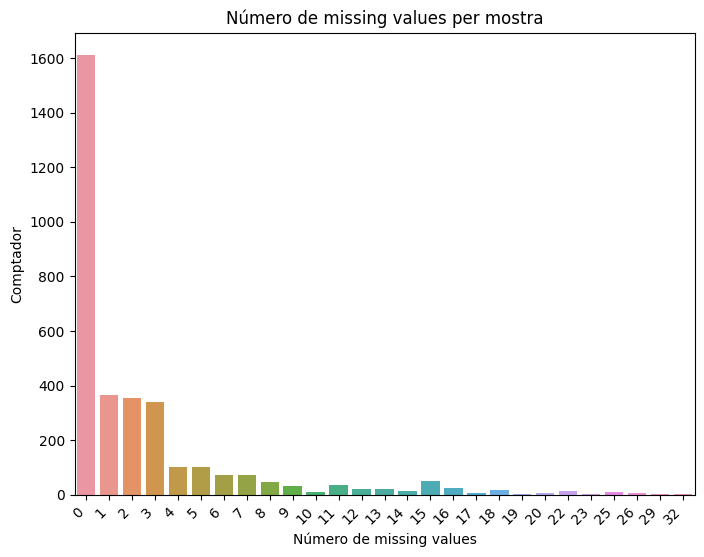

In [11]:
# Barplot amb el numero de missing values per fila 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.isnull().sum(axis=1))
plt.title(f'Número de missing values per mostra')
plt.xlabel('Número de missing values')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()


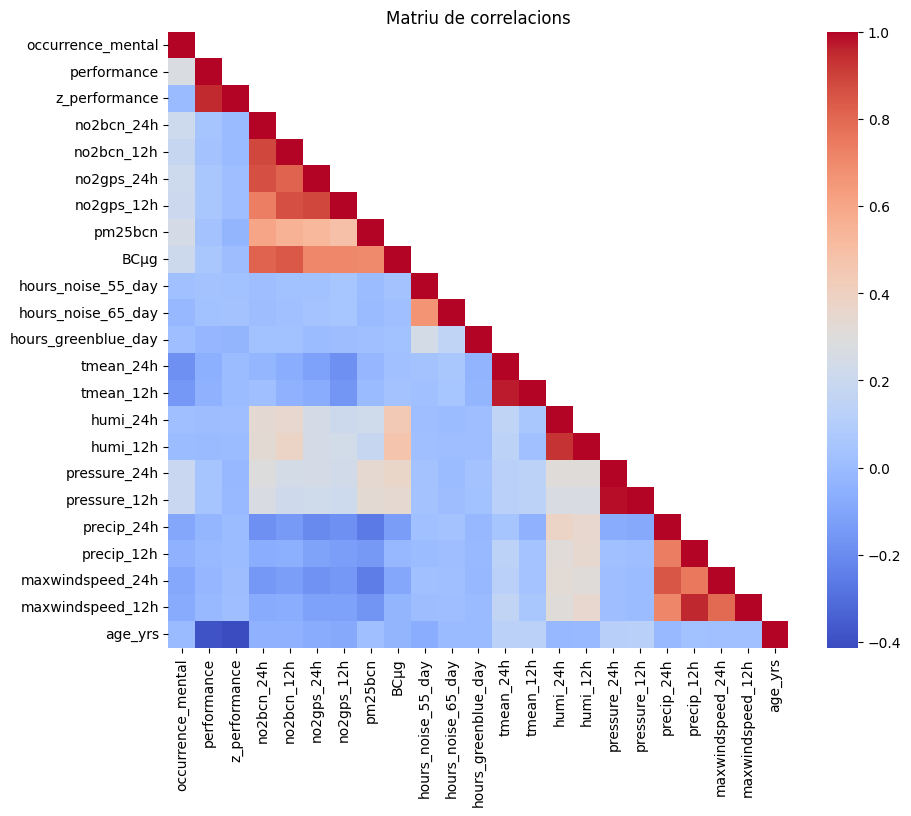

In [12]:
# Creem un nou DataFrame només amb les variables numèriques
df_numeric = df.select_dtypes(include=[np.number])

# Calculem la matriu de correlació
corr = df_numeric.corr()

# Creem una màscara per a la part superior del triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plotejem la matriu de correlació
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title('Matriu de correlacions')
plt.show()

<Axes: xlabel='age_yrs', ylabel='z_performance'>

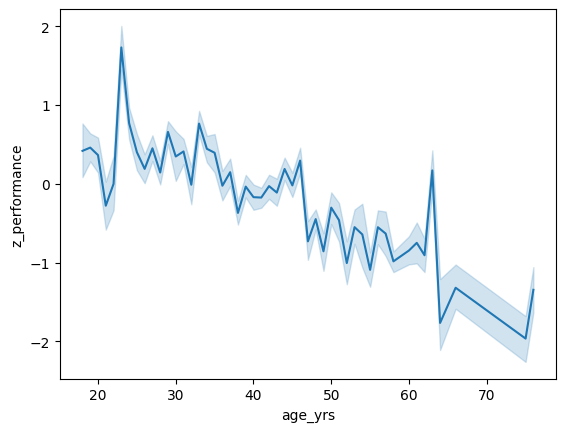

In [13]:
sns.lineplot(data=df, x='age_yrs', y='z_performance')

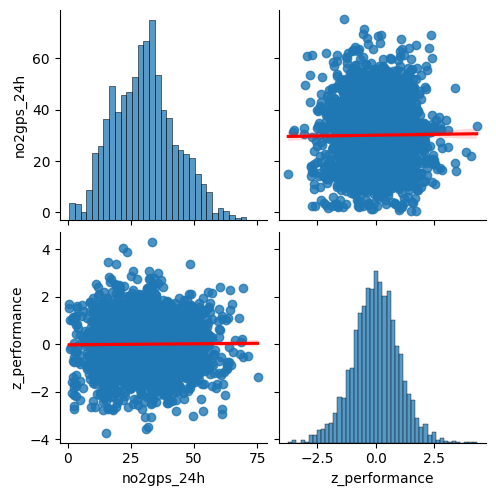

In [14]:
df_numeric = df[['no2gps_24h', 'z_performance']]
sns.pairplot(df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

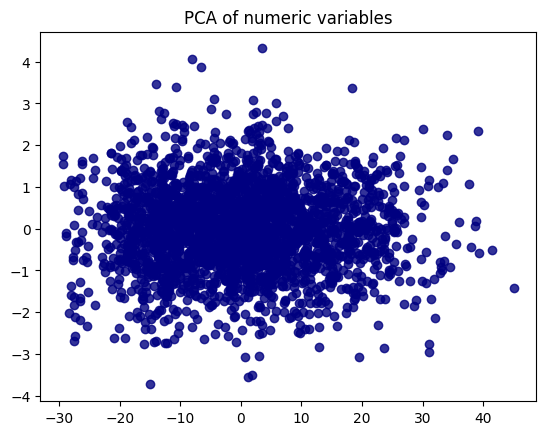

In [15]:
pca = PCA(n_components=2)

no_miss = df_numeric.dropna()
X_r = pca.fit_transform(no_miss)

# Plot PCA results
plt.figure()

plt.scatter(X_r[:, 0], X_r[:, 1], color='navy', alpha=.8)
plt.title('PCA of numeric variables')

plt.show()

## Preprocessament

CAL SEPARAR EN TRAIN I TEST PERÒ ÉS PER VEURE MÉS O MENYS QUÈ PODEM FER

Eliminem els missing de estres

In [16]:
deleted_na_perf = df.dropna(subset="estres")

missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

missing_values
bienestar                                     3
energia                                       3
sueno                                        11
actividadfisica                              14
ordenador                                    18
dieta                                        19
alcohol                                      23
drogas                                       18
bebida                                       19
enfermo                                      23
otrofactor                                   33
performance                                 297
z_performance                               297
no2gps_24h                                  168
no2gps_12h                                  172
BCμg                                        275
hours_noise_55_day                          455
hours_noise_65_day                          455
hours_greenblue_day                         455
noise_total_LDEN_55                         263
access_greenbluespaces_300mbuff             263
incidence_cat                               311
age_yrs                                     154
smoke                                       304
psycho                                      333
gender                                       10
district                                    142
education                                   271
covid_work                                   22
covid_mood                                  138
covid_sleep                                 147
covid_espacios                              157
covid_aire                                  157
covid_motor                                 210
covid_electric                              257
covid_bikewalk                              171
covid_public_trans                          171

In [17]:
deleted_na_perf.shape

(3173, 56)

In [18]:
deleted_na_perf = deleted_na_perf[deleted_na_perf.isnull().sum(axis=1) < 10]

In [19]:
deleted_na_perf.shape

(3040, 56)

In [20]:
missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

missing_values
bienestar                                     3
energia                                       3
sueno                                        11
actividadfisica                               6
ordenador                                     8
dieta                                         9
alcohol                                      13
drogas                                        8
bebida                                        8
enfermo                                      12
otrofactor                                   21
performance                                 286
z_performance                               286
no2gps_24h                                  168
no2gps_12h                                  172
BCμg                                        254
hours_noise_55_day                          436
hours_noise_65_day                          436
hours_greenblue_day                         436
noise_total_LDEN_55                         188
access_greenbluespaces_300mbuff             188
incidence_cat                               305
age_yrs                                      94
smoke                                       186
psycho                                      215
gender                                       10
district                                     74
education                                   154
covid_work                                    8
covid_mood                                   15
covid_sleep                                  23
covid_espacios                               33
covid_aire                                   33
covid_motor                                  86
covid_electric                              133
covid_bikewalk                               47
covid_public_trans                           47

In [21]:
deleted_na_cols = deleted_na_perf.dropna(axis=1, thresh=len(deleted_na_perf)-280)

In [22]:
missing_values1 = deleted_na_cols.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

missing_values
bienestar                                     3
energia                                       3
sueno                                        11
actividadfisica                               6
ordenador                                     8
dieta                                         9
alcohol                                      13
drogas                                        8
bebida                                        8
enfermo                                      12
otrofactor                                   21
no2gps_24h                                  168
no2gps_12h                                  172
BCμg                                        254
noise_total_LDEN_55                         188
access_greenbluespaces_300mbuff             188
age_yrs                                      94
smoke                                       186
psycho                                      215
gender                                       10
district                                     74
education                                   154
covid_work                                    8
covid_mood                                   15
covid_sleep                                  23
covid_espacios                               33
covid_aire                                   33
covid_motor                                  86
covid_electric                              133
covid_bikewalk                               47
covid_public_trans                           47

<Axes: >

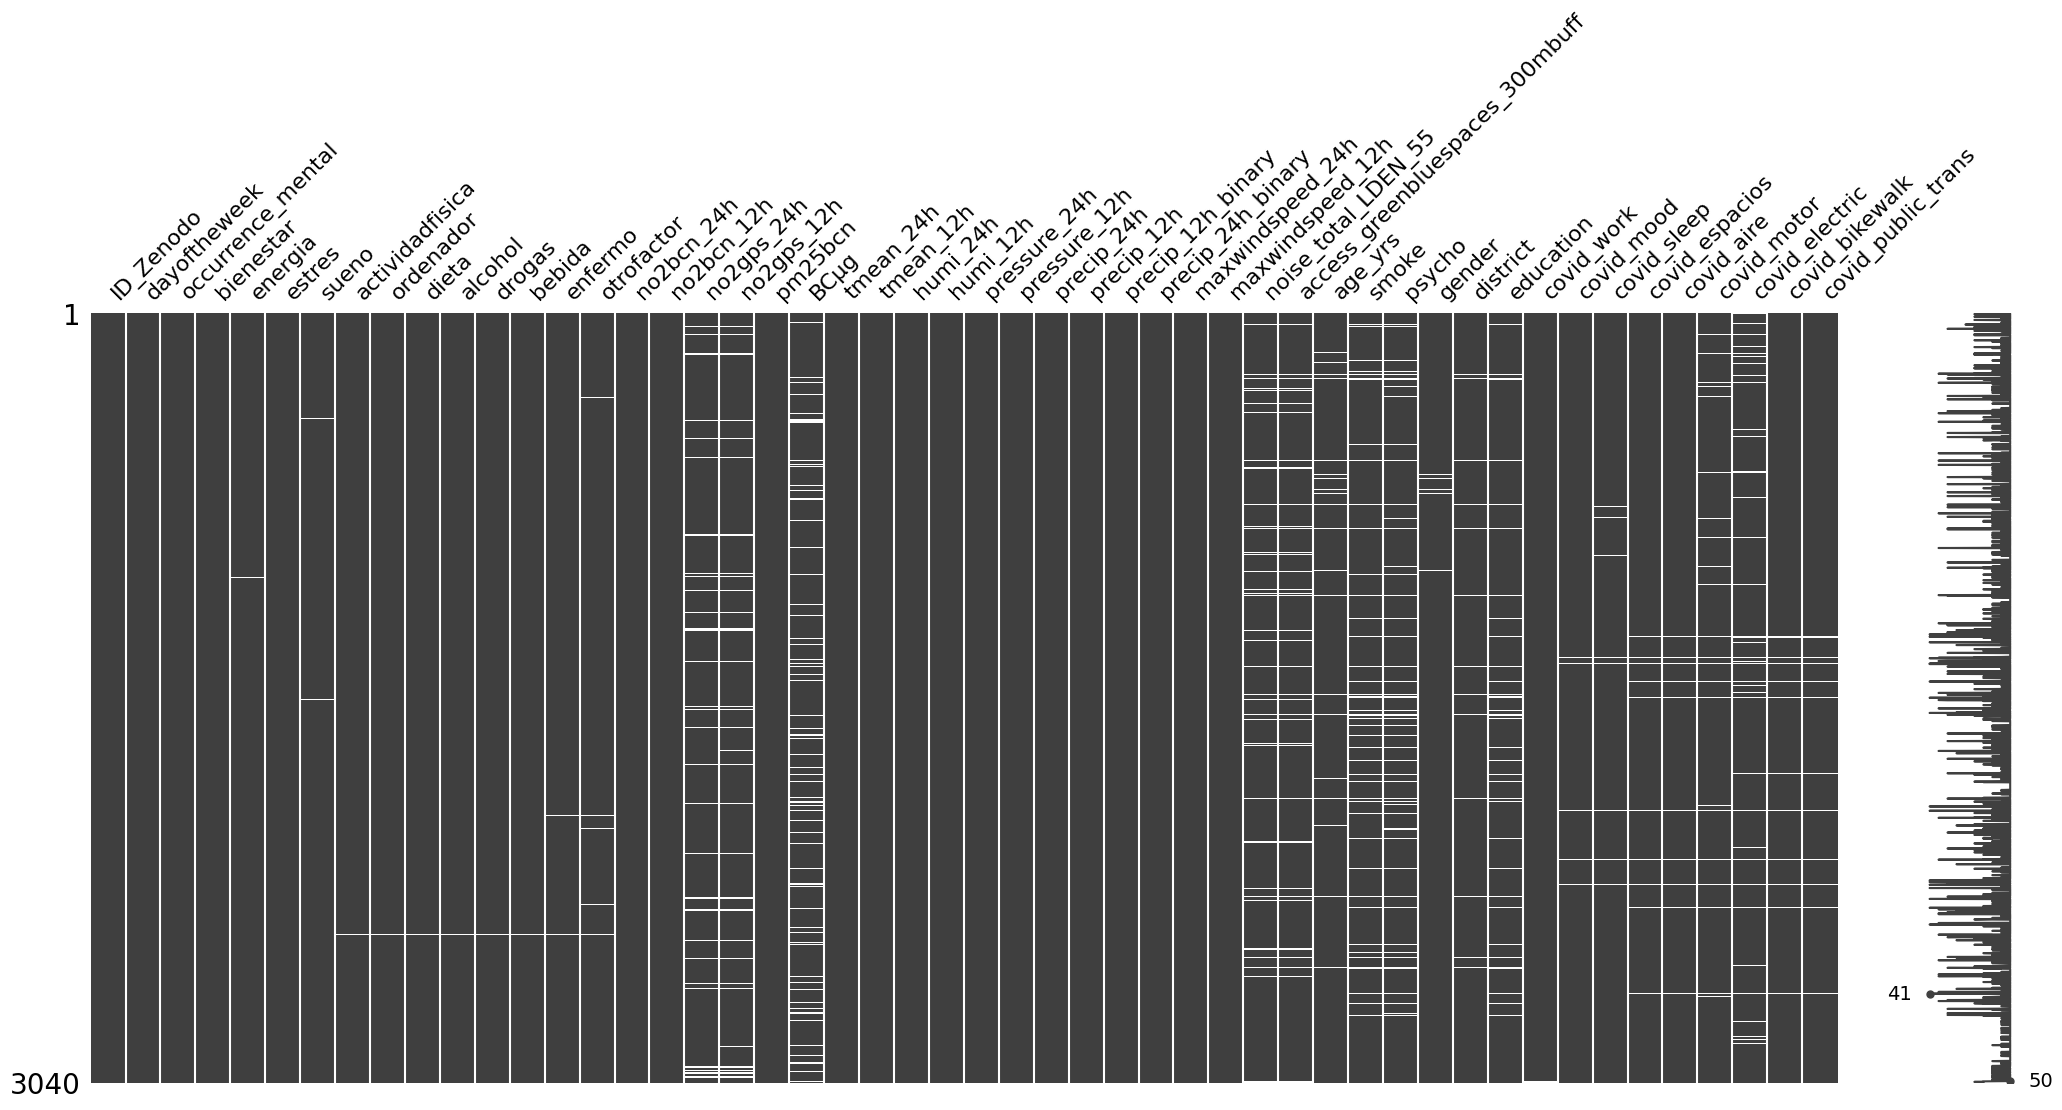

In [23]:
msno.matrix(deleted_na_cols)

In [24]:
unique_na = deleted_na_perf.drop_duplicates("ID_Zenodo")

In [25]:
missing_values1 = unique_na.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

missing_values
bienestar                                     1
energia                                       1
sueno                                         1
actividadfisica                               1
ordenador                                     1
dieta                                         1
alcohol                                       1
drogas                                        1
bebida                                        1
enfermo                                       1
otrofactor                                    1
performance                                  27
z_performance                                27
no2gps_24h                                   18
no2gps_12h                                   18
BCμg                                         20
hours_noise_55_day                           40
hours_noise_65_day                           40
hours_greenblue_day                          40
noise_total_LDEN_55                          21
access_greenbluespaces_300mbuff              21
incidence_cat                                35
age_yrs                                       9
smoke                                        18
psycho                                       21
gender                                        1
district                                      7
education                                    15
covid_work                                    1
covid_mood                                    2
covid_sleep                                   4
covid_espacios                                4
covid_aire                                    4
covid_motor                                   8
covid_electric                               13
covid_bikewalk                                5
covid_public_trans                            5

## Balanceig de les dades:

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(deleted_na_cols, test_size = 0.2, random_state=42)

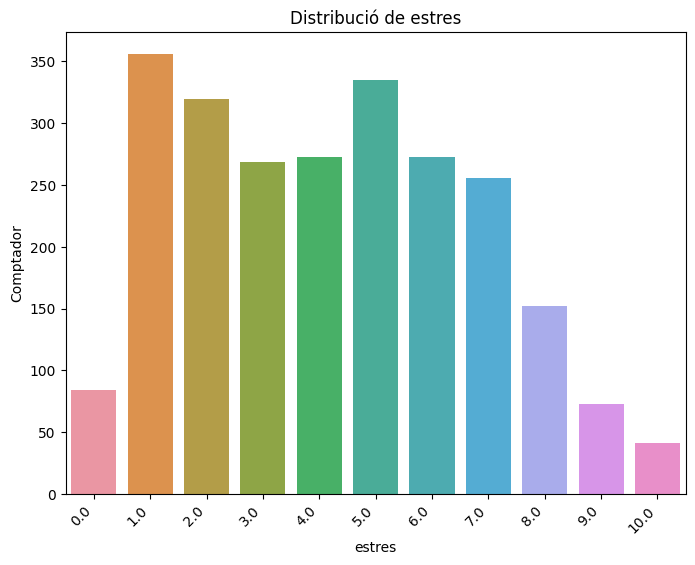

Número de valors per estres:
estres
1.0     356
5.0     335
2.0     320
4.0     273
6.0     273
3.0     269
7.0     256
8.0     152
0.0      84
9.0      73
10.0     41
Name: count, dtype: int64




In [27]:
# Plotjem un barplot de estres
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='estres')
plt.title(f'Distribució de estres')
plt.xlabel('estres')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()

# Printejem el numero de valors per estres
print("Número de valors per estres:")
print(train['estres'].value_counts())
print("\n")


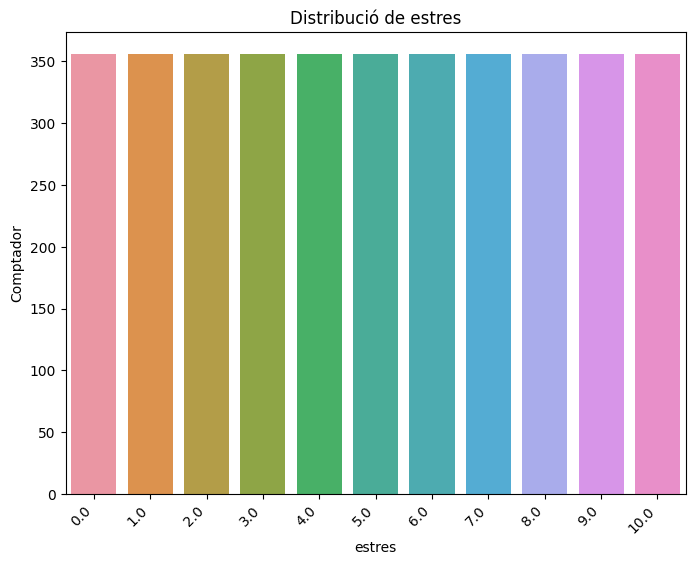

In [28]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Identifiquem les característiques i la variable objectiu
features = train.drop('estres', axis=1)
target = train['estres']

# Creem un objecte RandomOverSampler per totes les classes menys 1.0, oversamplejant totes les altres a 356
oversampler = RandomOverSampler(sampling_strategy={0.0: 356, 2.0: 356, 3.0: 356, 4.0: 356, 5.0: 356, 6.0: 356, 7.0: 356, 8.0: 356, 9.0: 356, 10.0: 356})

# Apliquem l'oversampling només a la classe 'CL'
features_resampled, target_resampled = oversampler.fit_resample(features, target)

# Reconstruim el DataFrame amb les noves dades
train_balanc = pd.concat([pd.DataFrame(features_resampled, columns=features.columns), pd.Series(target_resampled, name='estres')], axis=1)

# Plotjem un barplot de estres
plt.figure(figsize=(8, 6))
sns.countplot(data=train_balanc, x='estres')
plt.title(f'Distribució de estres')
plt.xlabel('estres')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()



## Partició en Train i Test

In [29]:
X_train = train.drop('estres', axis=1)
y_train = train['estres']

X_test = test.drop('estres', axis=1)
y_test = test['estres']

In [30]:
num_cols = X_train.select_dtypes(include='number').columns
print(X_train[num_cols])

      occurrence_mental  no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  \
226                 4.0   32.226190   27.011905   31.075078   30.677997   
848                 3.0   23.934524   24.476190   17.759847   20.595703   
1224                5.0   44.895437   48.695635   34.117472   42.688802   
243                12.0   24.529762   17.083333   26.099691   19.452962   
397                 8.0   30.461111   26.616667   26.905436   23.793518   
...                 ...         ...         ...         ...         ...   
1796               11.0   47.232143   58.333333   47.144939   64.882805   
1187                5.0   13.785714    9.285714         NaN         NaN   
1226               13.0   41.680556   20.277778   31.802205   13.780029   
1405               12.0   34.486111   20.694444   45.576558   23.056360   
933                12.0   16.107143   19.452381   16.324280   18.668213   

        pm25bcn      BCμg  tmean_24h  tmean_12h   humi_24h   humi_12h  \
226   10.100000  0.785383 

Usem un imputador per emplenar la resta de missings

In [31]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

num_cols = X_train.select_dtypes(include='number').columns

numeric_delna = X_train[num_cols]
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(numeric_delna)

X_train[num_cols] = imp_mean.transform(numeric_delna)
X_test[num_cols] = imp_mean.transform(X_test[num_cols])

In [32]:
print(X_train[num_cols])

      occurrence_mental  no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  \
226                 4.0   32.226190   27.011905   31.075078   30.677997   
848                 3.0   23.934524   24.476190   17.759847   20.595703   
1224                5.0   44.895437   48.695635   34.117472   42.688802   
243                12.0   24.529762   17.083333   26.099691   19.452962   
397                 8.0   30.461111   26.616667   26.905436   23.793518   
...                 ...         ...         ...         ...         ...   
1796               11.0   47.232143   58.333333   47.144939   64.882805   
1187                5.0   13.785714    9.285714   14.841173    9.952064   
1226               13.0   41.680556   20.277778   31.802205   13.780029   
1405               12.0   34.486111   20.694444   45.576558   23.056360   
933                12.0   16.107143   19.452381   16.324280   18.668213   

        pm25bcn      BCμg  tmean_24h  tmean_12h   humi_24h   humi_12h  \
226   10.100000  0.785383 

Ens queden les categòriques. Emplenem amb KNN

In [33]:
from sklearn.neighbors import NearestNeighbors

class KNNImputer:
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
    def fit(self, X, numeric_cols):
        self.X = X.dropna().copy() # suposem que les numeriques estan imputades
        self.numeric = numeric_cols
        self.vecinos = NearestNeighbors(n_neighbors=self.n_neighbors).fit(X.dropna()[numeric_cols])
    def _get_mode(self, variable, indexs):
        vecinos = [self.X.iloc[[i]].iloc[0] for i in indexs[0]]
        valors = [v.iloc[variable] for v in vecinos]
        unique, counts = np.unique(valors, return_counts = True)
        mode = unique[np.argmax(counts)]
        return mode
    def _impute_row(self, row):
        dist, indexs = self.vecinos.kneighbors([row[self.numeric]])
        for variable, value in enumerate(row.isna()):
            if value:
                mode = self._get_mode(variable, indexs)
                row.iloc[variable] = mode
        return row
    def transform(self, X):
        X_imputed = []
        for ind, row in X.iterrows():
            new_row = self._impute_row(row)
            X_imputed.append(new_row)
        return pd.DataFrame(X_imputed, columns=X.columns)

In [34]:
np.unique(X_train.dropna()["education"])

array(['Bachillerato', 'Primario o menos', 'Universitario'], dtype=object)

In [35]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

imputer = KNNImputer()

imputer.fit(X_train, num_cols)

X_train_new = imputer.transform(X_train)
X_test_new = imputer.transform(X_test)

X_train_new.head()

ID_Zenodo  dayoftheweek  occurrence_mental  bienestar  energia  sueno  \
226          19             1                4.0        9.0      7.0    8.0   
848         189             6                3.0        7.0      6.0    5.0   
1224        139             1                5.0        7.0      7.0    5.0   
243         110             6               12.0        5.0      2.0    2.0   
397          74             4                8.0        6.0      3.0    5.0   

     actividadfisica ordenador dieta alcohol  ...      education  \
226              Yes       Yes    No     Yes  ...  Universitario   
848               No        No    No     Yes  ...   Bachillerato   
1224             Yes       Yes   Yes      No  ...   Bachillerato   
243               No       Yes    No     Yes  ...  Universitario   
397               No       Yes   Yes      No  ...  Universitario   

                covid_work            covid_mood           covid_sleep  \
226     Ha empeorado mucho   Ha mejorado un poco        No ha cambiado   
848   Ha empeorado un poco  Ha empeorado un poco  Ha empeorado un poco   
1224        No ha cambiado  Ha empeorado un poco        No ha cambiado   
243     Ha empeorado mucho        No ha cambiado        No ha cambiado   
397   Ha empeorado un poco  Ha empeorado un poco        No ha cambiado   

                        covid_espacios                        covid_aire  \
226   Le doy más importancia que antes  Le doy más importancia que antes   
848   Le doy más importancia que antes  Le doy más importancia que antes   
1224  Le doy más importancia que antes  Le doy más importancia que antes   
243   Le doy más importancia que antes  Le doy más importancia que antes   
397                     No ha cambiado  Le doy más importancia que antes   

                     covid_motor              covid_electric  \
226   Lo utilizo menos que antes  Lo utilizo menos que antes   
848     Lo utilizo más que antes  Lo utilizo igual que antes   
1224  Lo utilizo igual que antes  Lo utilizo igual que antes   
243   Lo utilizo igual que antes    Lo utilizo más que antes   
397   Lo utilizo igual que antes  Lo utilizo igual que antes   

                covid_bikewalk          covid_public_trans  
226   Lo utilizo más que antes  Lo utilizo menos que antes  
848   Lo utilizo más que antes  Lo utilizo menos que antes  
1224  Lo utilizo más que antes  Lo utilizo igual que antes  
243   Lo utilizo más que antes  Lo utilizo menos que antes  
397   Lo utilizo más que antes  Lo utilizo menos que antes  

[5 rows x 49 columns]

In [36]:
X_train_new["education"].unique()

array(['Universitario', 'Bachillerato', 'Primario o menos'], dtype=object)

In [37]:
X_train_new.shape

(2432, 49)

In [38]:
unique_na = X_train_new.drop_duplicates("ID_Zenodo")

missing_values1 = unique_na.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

Empty DataFrame
Columns: [missing_values]
Index: []

In [39]:
# Mode imputation
"""
for col in deleted_na_perf.columns:
    deleted_na_perf[col] = deleted_na_perf[col].fillna(value=deleted_na_perf[col].mode()[0])
"""

'\nfor col in deleted_na_perf.columns:\n    deleted_na_perf[col] = deleted_na_perf[col].fillna(value=deleted_na_perf[col].mode()[0])\n'

Tractem les variables textuals de COVID

In [40]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

for column in covid:
    X_train_new[column] = X_train_new[column].apply(lambda x: 'Yes' if 'no' in x.lower() or 'igual' in x.lower() else 'No')
    X_test_new[column] = X_test_new[column].apply(lambda x: 'Yes' if 'no' in x.lower() or 'igual' in x.lower() else 'No')

# print categories for covid variables

for col in covid:
    print(f'{col}: {X_train_new[col].unique()}')

covid_work: ['No' 'Yes']
covid_mood: ['No' 'Yes']
covid_sleep: ['Yes' 'No']
covid_espacios: ['No' 'Yes']
covid_aire: ['No' 'Yes']
covid_motor: ['Yes' 'No']
covid_electric: ['Yes' 'No']
covid_bikewalk: ['No' 'Yes']
covid_public_trans: ['Yes' 'No']


In [41]:
X_train_new['education'].unique()

array(['Universitario', 'Bachillerato', 'Primario o menos'], dtype=object)

In [42]:
unique_na = X_train_new.drop_duplicates("ID_Zenodo")

missing_values1 = unique_na.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

Empty DataFrame
Columns: [missing_values]
Index: []

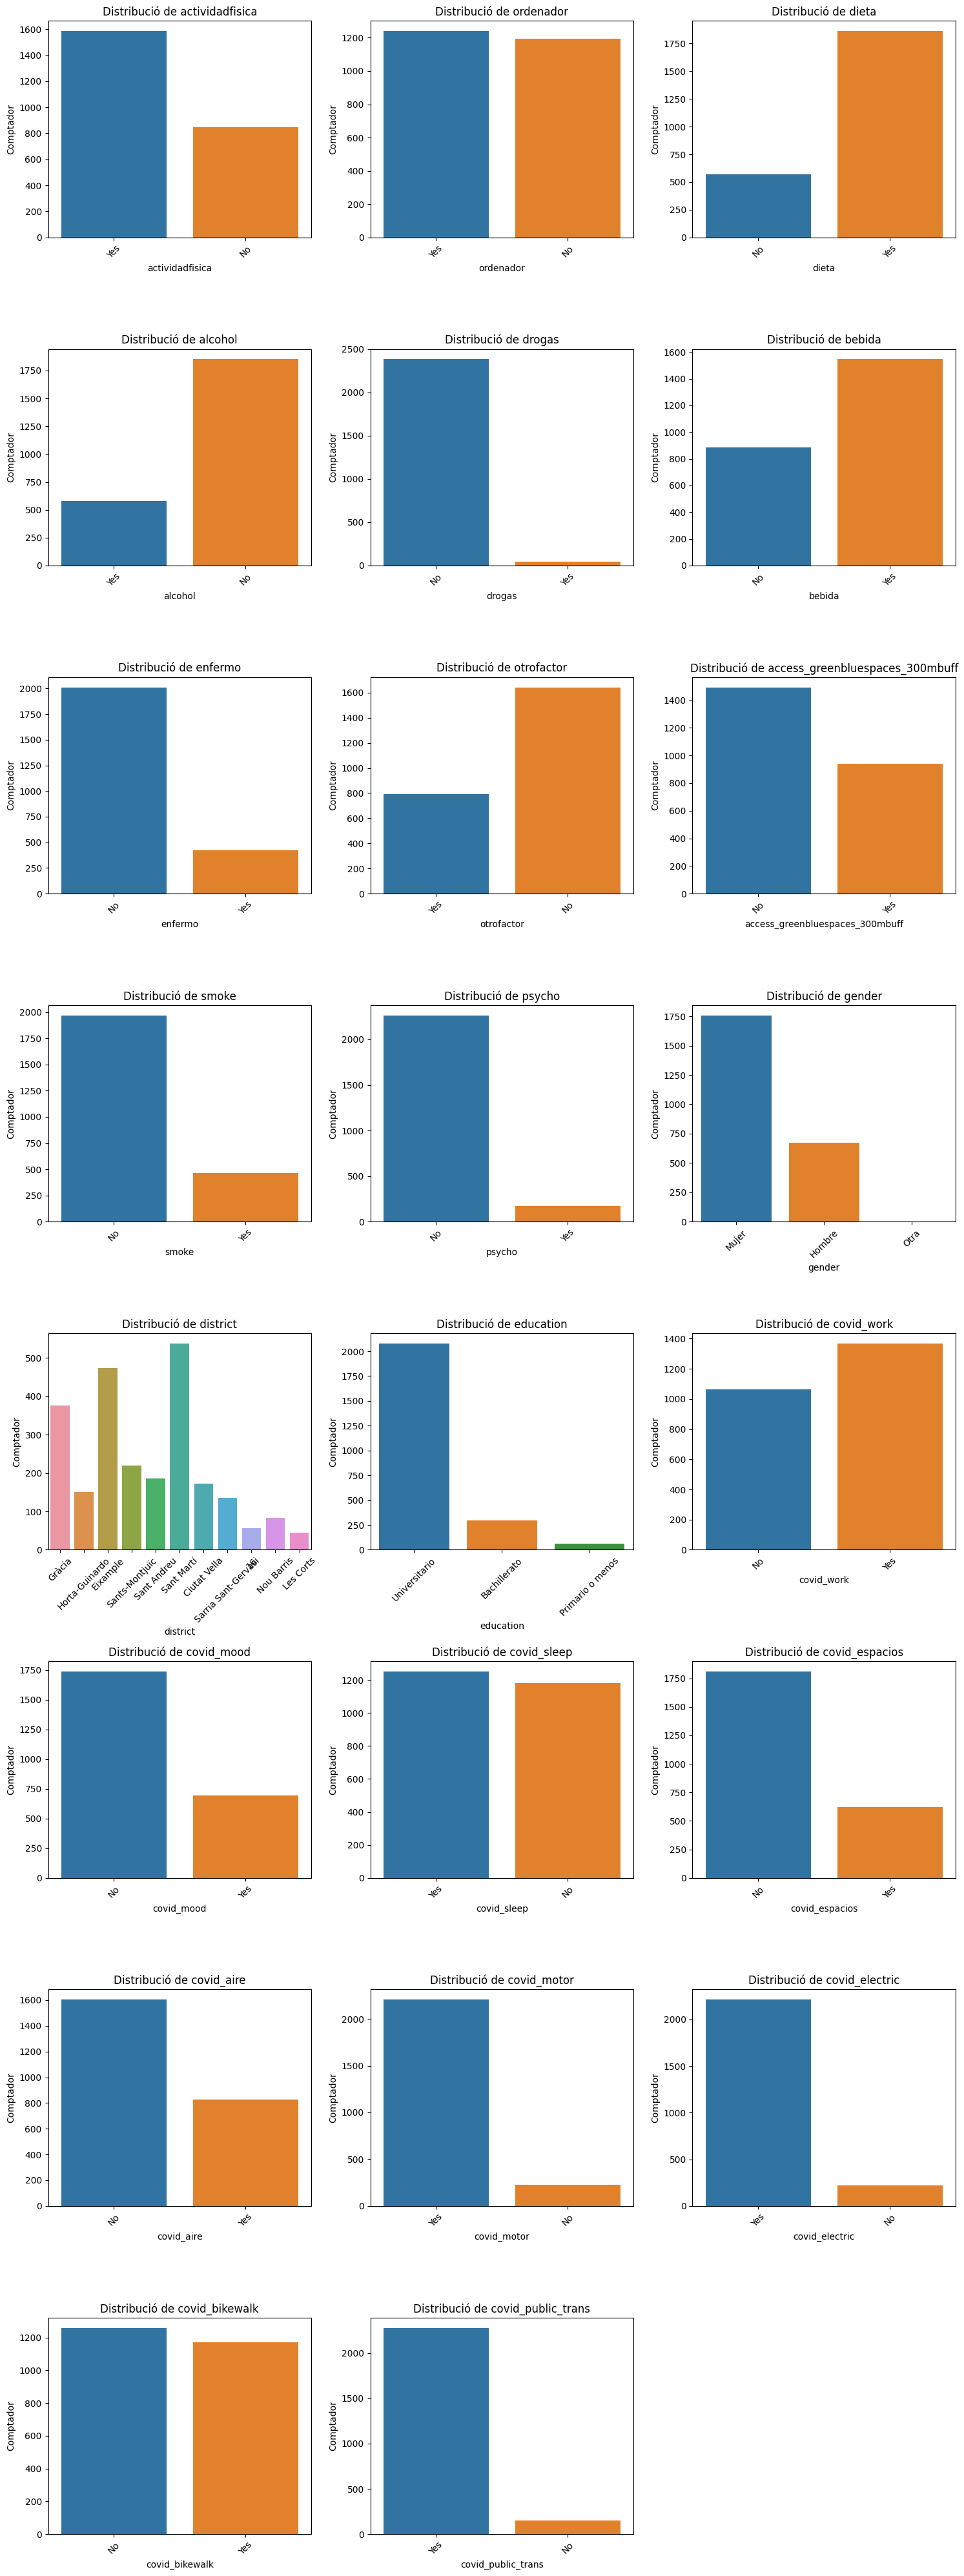

In [43]:
# Gráfics de barres per variables categòriques
cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=X_train_new, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

In [44]:
# Creem una nova variable anomenada 'covid_afecta' binaria, on True indica que la persona ha estat afectada per la covid i False en cas contrari.
# Aquesta variable es crea a partir de les variables de la llista 'covid', i fem la moda de les respostes per a cada individu.

for row in X_train_new.iterrows():
    # Si la moda de les respostes de les variables de la llista 'covid' és 'Yes', la persona ha estat afectada per la covid
    if row[1][covid].mode()[0] == 'Yes':
        X_train_new.at[row[0], 'covid_afecta'] = 'Yes'
    else:
        X_train_new.at[row[0], 'covid_afecta'] = 'No'

for row in X_test_new.iterrows():
    # Si la moda de les respostes de les variables de la llista 'covid' és 'Yes', la persona ha estat afectada per la covid
    if row[1][covid].mode()[0] == 'Yes':
        X_test_new.at[row[0], 'covid_afecta'] = 'Yes'
    else:
        X_test_new.at[row[0], 'covid_afecta'] = 'No'

# Eliminem les variables de la llista 'covid' ja que ja no les necessitem
X_train_new = X_train_new.drop(covid, axis=1)
X_test_new = X_test_new.drop(covid, axis=1)

print(X_train_new['covid_afecta'].value_counts())

covid_afecta
Yes    1570
No      862
Name: count, dtype: int64


## Recodificació de variables

In [45]:
X_train_new['education'].unique()

array(['Universitario', 'Bachillerato', 'Primario o menos'], dtype=object)

In [46]:
to_cat = ['ID_Zenodo', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in to_cat:
    X_train_new[name] = X_train_new[name].astype('category')
    X_test_new[name] = X_test_new[name].astype('category')

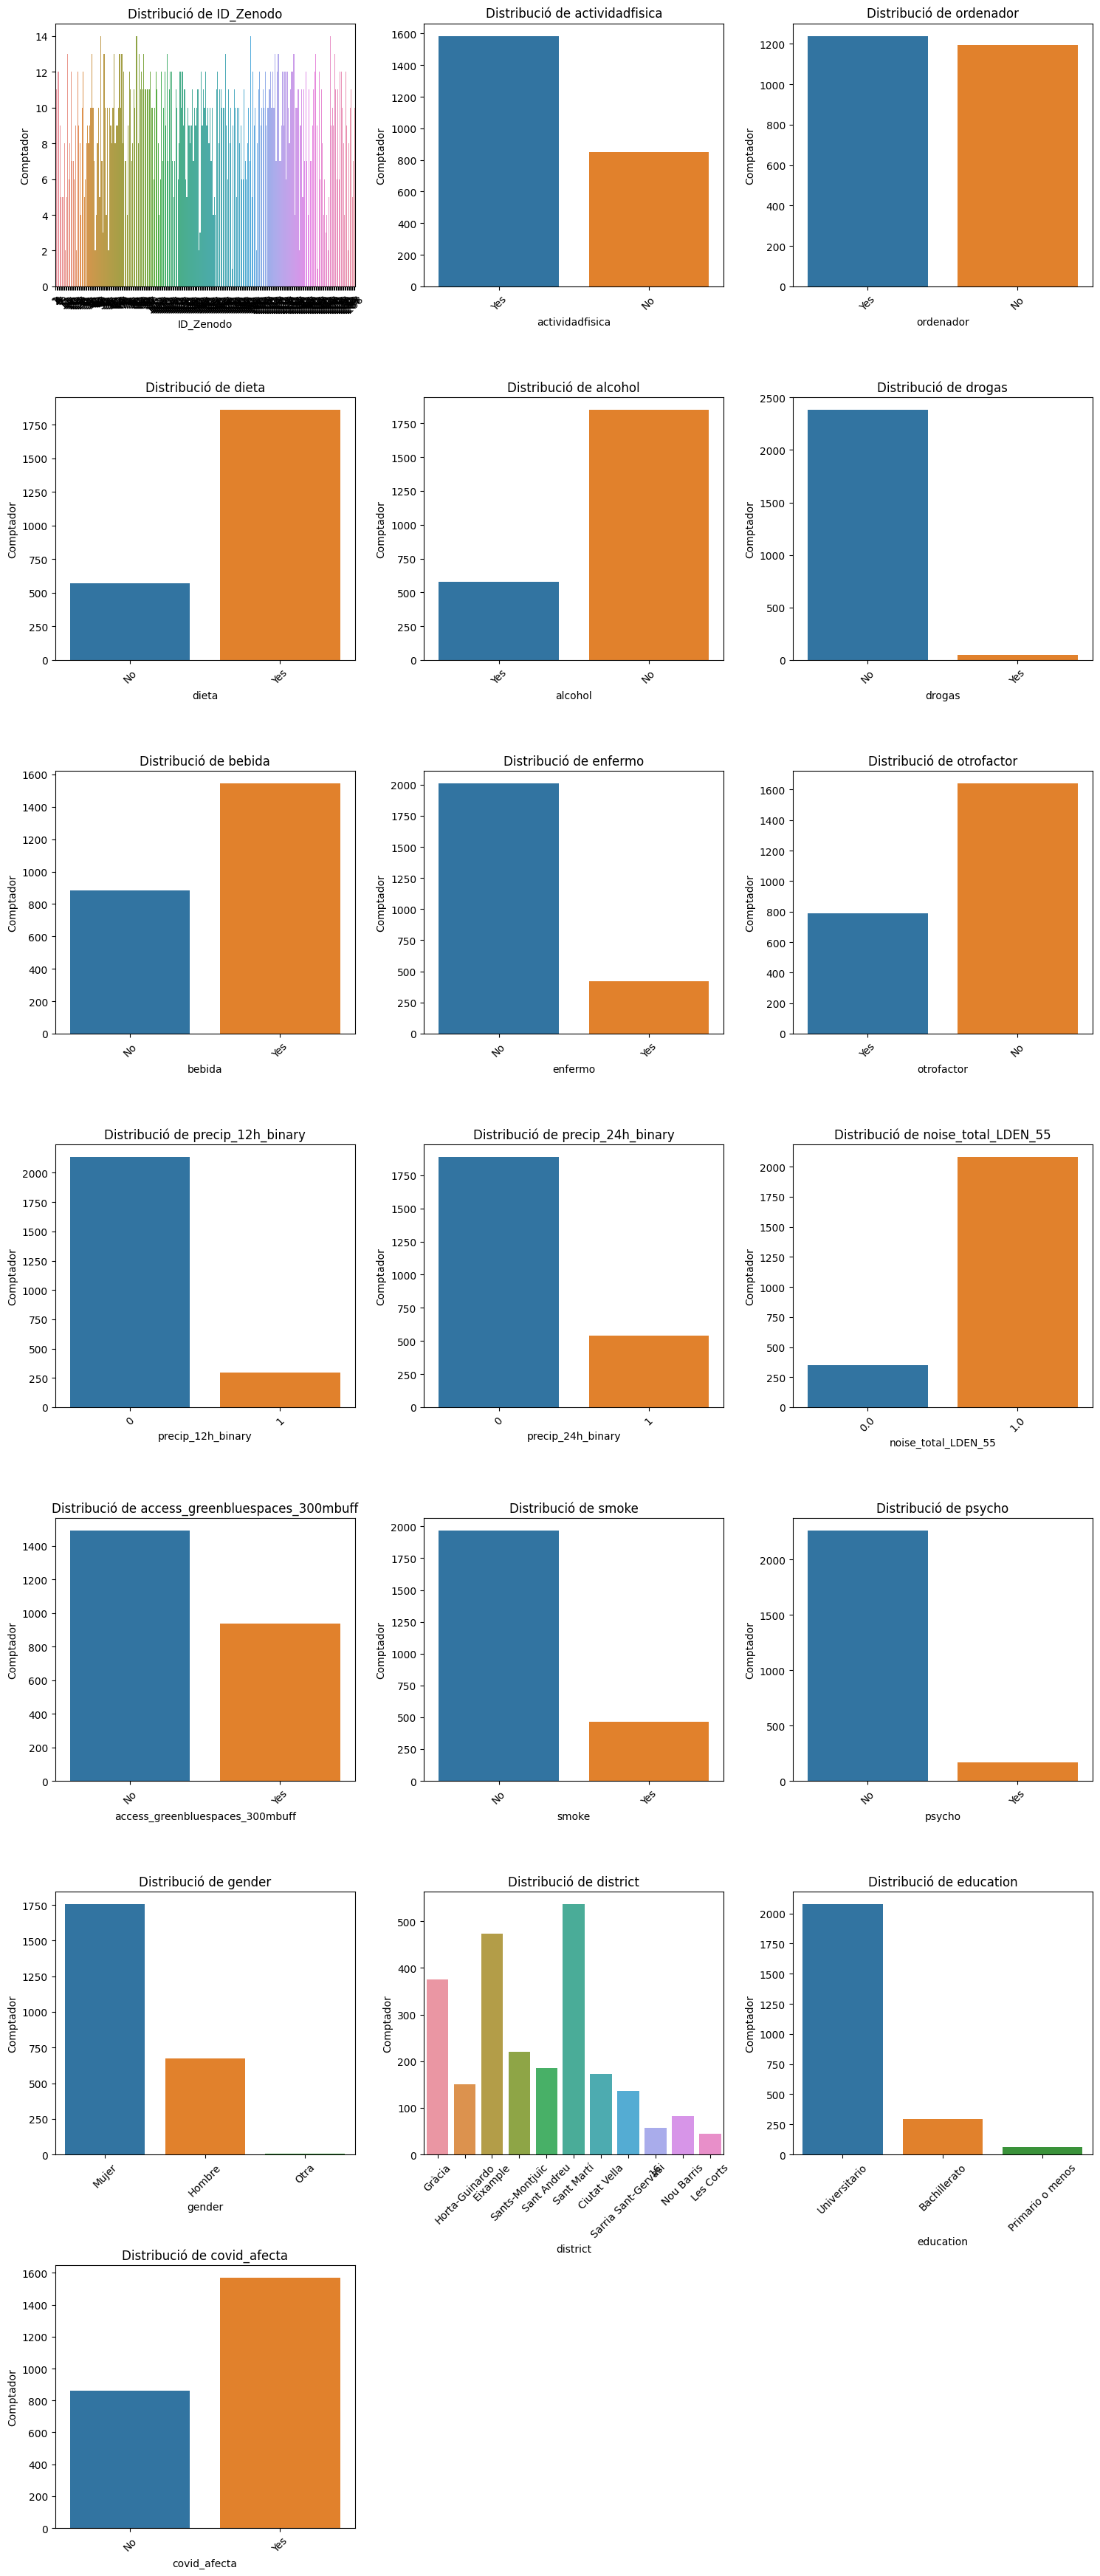

In [47]:
# Gráfics de barres per variables categòriques
cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=X_train_new, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

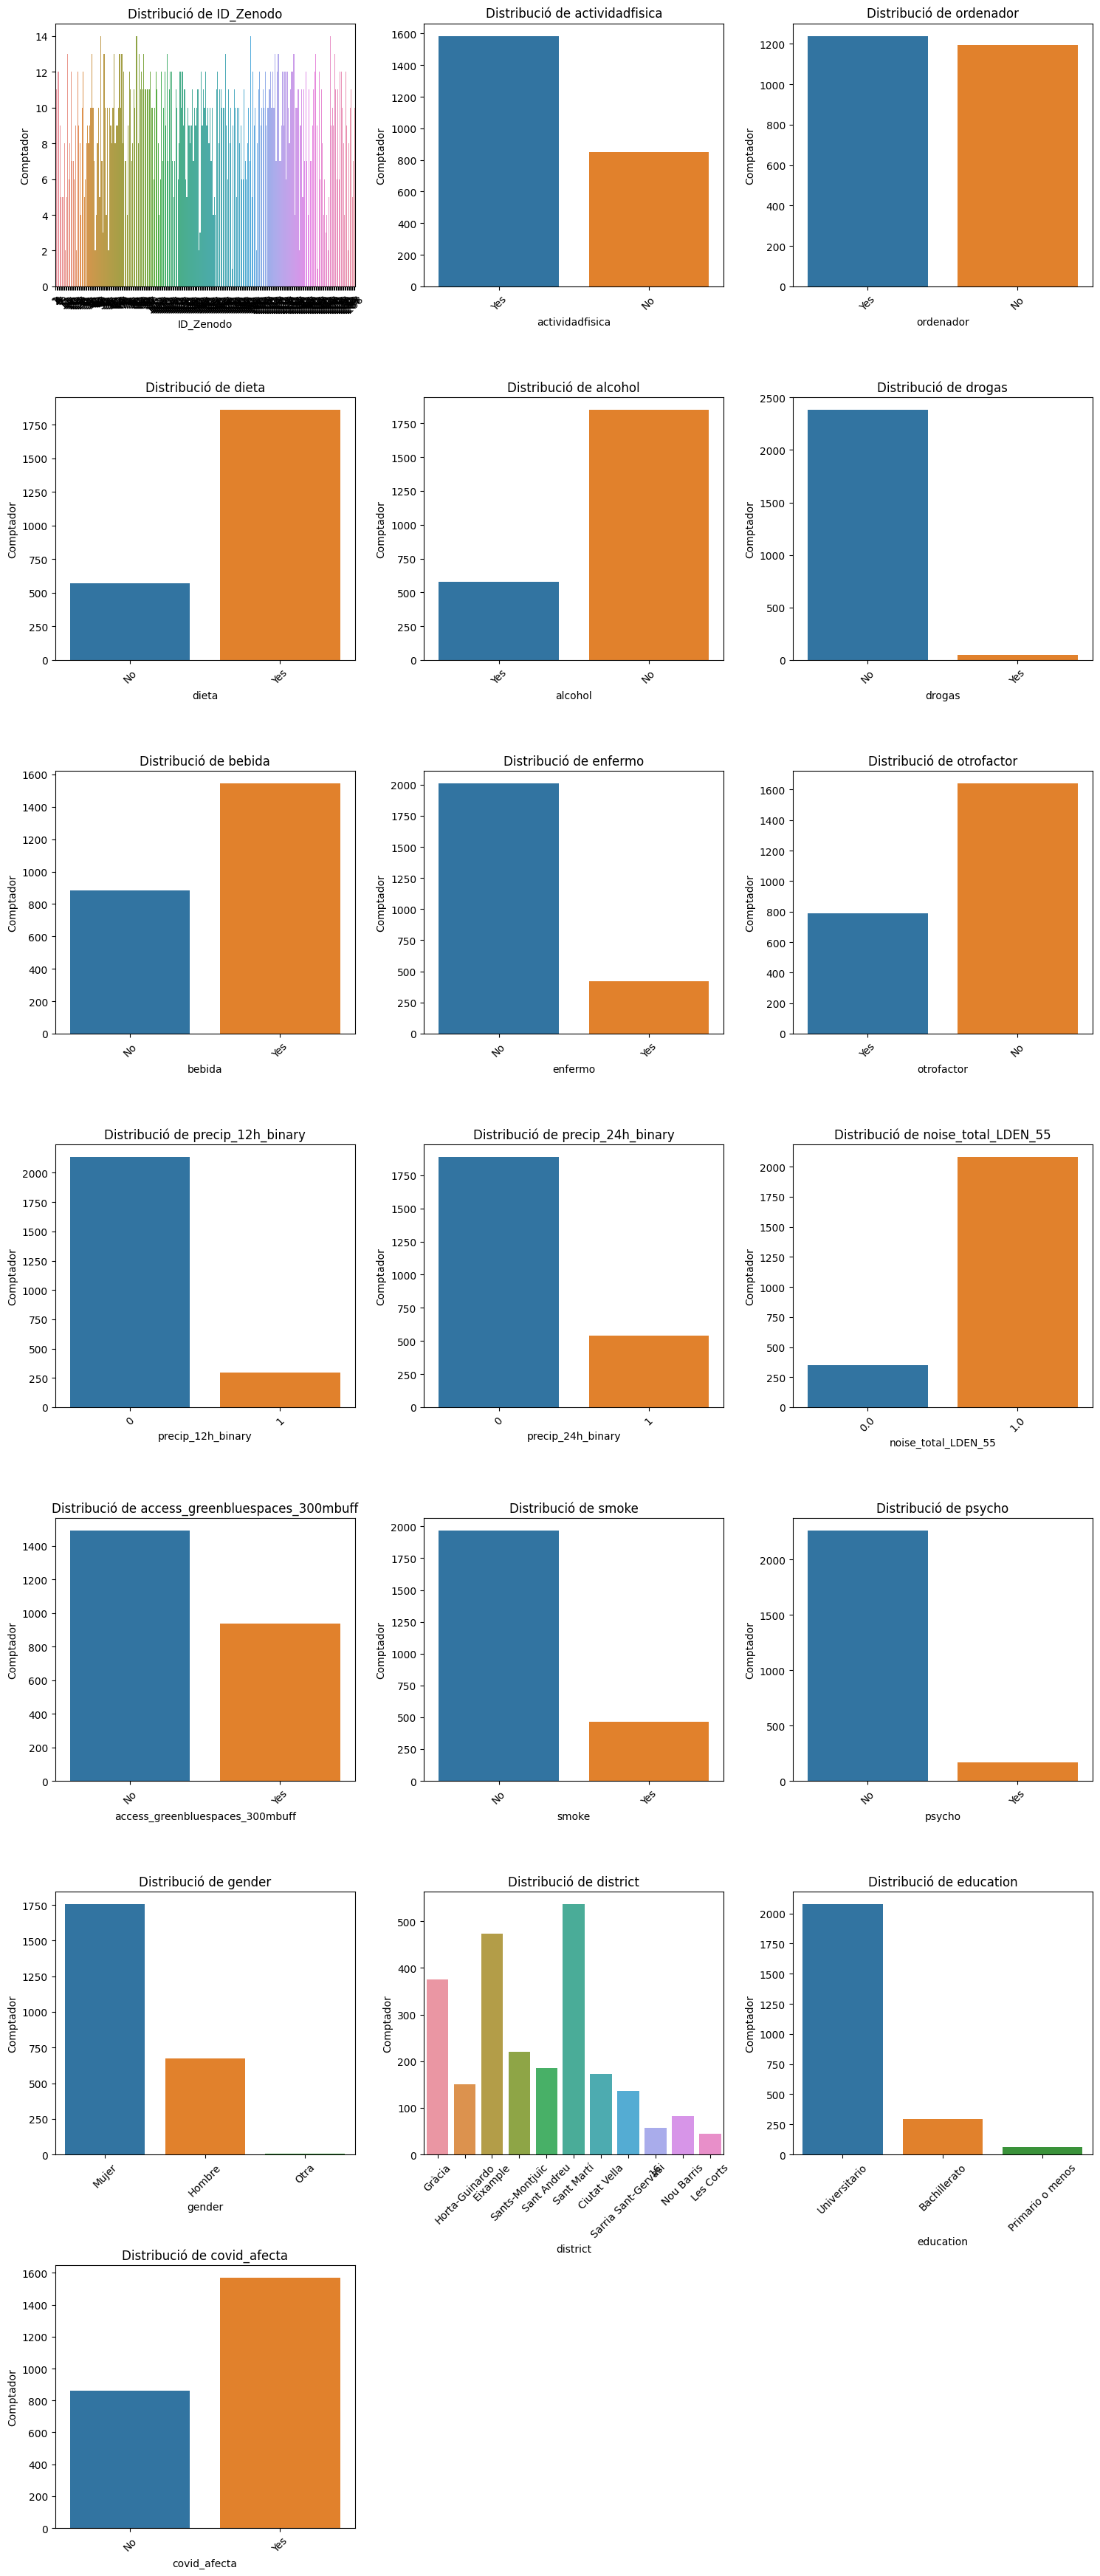

In [48]:
# Gráfics de barres per variables categòriques
cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=X_train_new, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

In [49]:
old_x_train = X_train_new.copy()
old_x_test = X_test_new.copy()

In [50]:
# Apliquem One Hot Encoding a les variables categòriques
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_cols = cat_cols.drop('ID_Zenodo')

hot_encoder = OneHotEncoder(drop = 'if_binary')
hot_encoder.fit(X_train_new[cat_cols])

# Apply the encoding to the train set
X_train_encoded = X_train_new.copy().reset_index()
encoded_cols = hot_encoder.transform(X_train_new[cat_cols]).toarray()

print(encoded_cols.shape)
X_train_encoded = X_train_encoded.drop(columns=cat_cols)
X_train_encoded = pd.concat([X_train_encoded, pd.DataFrame(encoded_cols, columns = hot_encoder.get_feature_names_out())], axis=1)

# Apply the encoding to the test set
X_test_encoded = X_test_new.copy().reset_index()
encoded_cols_test = hot_encoder.transform(X_test_new[cat_cols]).toarray()
X_test_encoded = X_test_encoded.drop(columns=cat_cols)
X_test_encoded = pd.concat([X_test_encoded, pd.DataFrame(encoded_cols_test, columns = hot_encoder.get_feature_names_out())], axis=1)

(2432, 32)


In [51]:
X_train_encoded.isna().sum()

index                                  0
ID_Zenodo                              0
dayoftheweek                           0
occurrence_mental                      0
bienestar                              0
energia                                0
sueno                                  0
no2bcn_24h                             0
no2bcn_12h                             0
no2gps_24h                             0
no2gps_12h                             0
pm25bcn                                0
BCμg                                   0
tmean_24h                              0
tmean_12h                              0
humi_24h                               0
humi_12h                               0
pressure_24h                           0
pressure_12h                           0
precip_24h                             0
precip_12h                             0
maxwindspeed_24h                       0
maxwindspeed_12h                       0
age_yrs                                0
actividadfisica_

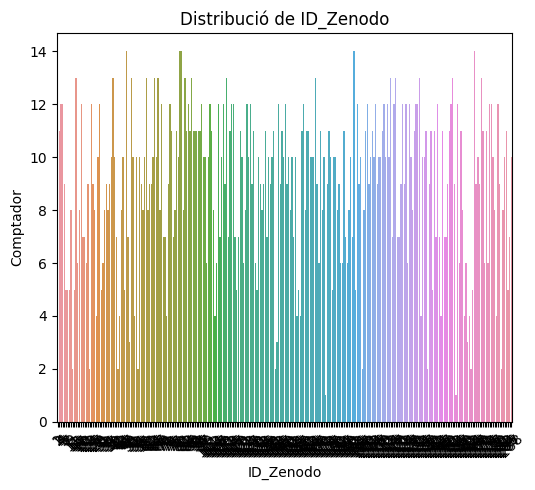

In [52]:
# Gráfics de barres per variables categòriques
cat_cols = X_train_encoded.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=X_train_encoded, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

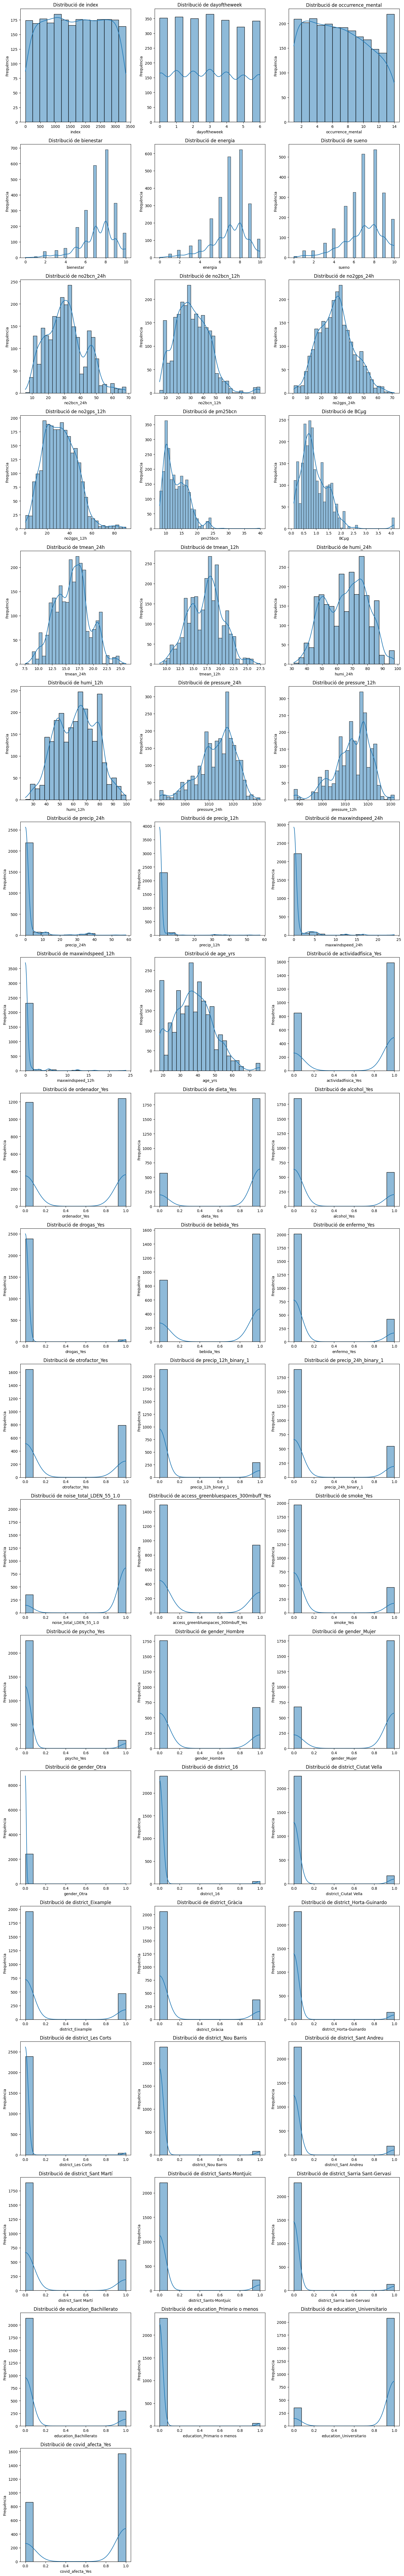

In [53]:
# Gráfics de distribució per variables numèriques
num_cols = X_train_encoded.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(X_train_encoded[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


## Estandarització de les dades

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Creem una còpia del DataFrame
X_train_std = X_train_encoded.copy()

# Apliquem la transformació MinMaxScaler a les variables numèriques originals
num_cols = X_train_encoded.select_dtypes(include='number').columns

# Creem un objecte MinMaxScaler i l'ajustem al conjunt de train
scaler = MinMaxScaler()
X_train_std[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])

# Apliquem la mateixa transformació al conjunt de test
X_test_std = X_test_encoded.copy()
X_test_std[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Printejem les estadístiques de les variables numèriques (mínim, màxim i mitjana només) per a train i test
print("Estadístiques de les variables numèriques per a train:")
print(X_train_std[num_cols].describe().loc[['min', 'max', 'mean']])
print("\n")

print("Estadístiques de les variables numèriques per a test:")
print(X_test_std[num_cols].describe().loc[['min', 'max', 'mean']])
print("\n")

Estadístiques de les variables numèriques per a train:
         index  dayoftheweek  occurrence_mental  bienestar   energia  \
min   0.000000      0.000000           0.000000   0.000000  0.000000   
max   1.000000      1.000000           1.000000   1.000000  1.000000   
mean  0.498554      0.492941           0.444237   0.722821  0.692845   

         sueno  no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  ...  \
min   0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max   1.000000    1.000000    1.000000    1.000000    1.000000  ...   
mean  0.690995    0.402653    0.324329    0.421021    0.343672  ...   

      district_Les Corts  district_Nou Barris  district_Sant Andreu  \
min             0.000000             0.000000              0.000000   
max             1.000000             1.000000              1.000000   
mean            0.018092             0.034128              0.076069   

      district_Sant Martí  district_Sants-Montjuïc  \
min              0.000000       

In [58]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [ ]:
# fem dummies pel y_train i y_test
from sklearn.preprocessing import ge

In [59]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

# regularizers
from keras.regularizers import l2


# Define the model
model = Sequential([
    Dense(units = 256, activation='relu', input_shape=(X_train_std.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(units = 128, activation='relu'),
    Dense(units = 11, activation='softmax')
])

# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)


# Train the model
num_epochs = 1000
batch_size = (X_train.shape[0]//40)+1
#history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)
history = model.fit(X_train_std, y_train_encoded, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2, callbacks=[early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(X_test_std, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot leaning curves
plot_curves(history)

ValueError: Invalid dtype: category